<a href="https://www.kaggle.com/code/amirhosseinpzh1998/house-price-prediction-in-tehran?scriptVersionId=142655105" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div class="alert alert-block alert-success">
    <h1 align="center"> Prediction of Houses's price in Tehran with Python</h1>
    <h3 align="center">Dataset is crawled from Divar.ir</h3>
</div>

## Import useful libraries 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import plotly.express as ex

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from matplotlib.cbook import boxplot_stats
from matplotlib import cbook

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import  ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

## Load and Read Dataset

In [2]:
df = pd.read_csv("/kaggle/input/features-there-are-in-divar/tehranhouses.csv")
df.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33
5,70,2,True,True,False,North Program Organization,2050000000,68333.33
6,87,2,True,True,True,Pardis,600000000,20000.00
7,59,1,True,True,True,Shahran,2150000000,71666.67
8,54,2,True,True,False,Andisheh,493000000,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2370000000,79000.00


In [3]:
columns = df.columns
j = 1
for i in columns:
    print("COLUMN %i =" %j, i)
    j = j + 1

COLUMN 1 = Area
COLUMN 2 = Room
COLUMN 3 = Parking
COLUMN 4 = Warehouse
COLUMN 5 = Elevator
COLUMN 6 = Address
COLUMN 7 = Price
COLUMN 8 = Price(USD)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   int64  
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(1), int64(2), object(2)
memory usage: 146.2+ KB


In [5]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [6]:
df['Area'] = df['Area'].apply(lambda x: re.sub(',', '', x))
df["Area"] = pd.to_numeric(df["Area"] , errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   int64  
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   int64  
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(1), int64(3), object(1)
memory usage: 146.2+ KB


In [8]:
df.shape

(3479, 8)

In [9]:
print(df.dtypes)

Area            int64
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price           int64
Price(USD)    float64
dtype: object


In [10]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending = False)
print(missing)

Address    23
dtype: int64


In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(3456, 8)

In [13]:
df['Parking'].value_counts(normalize=True)*100

Parking
True     84.751157
False    15.248843
Name: proportion, dtype: float64

In [14]:
pd.crosstab( df.Parking, df.Room )

Room,0,1,2,3,4,5
Parking,,,,,,
False,8,243,244,26,1,5
True,2,426,1699,705,69,28


In [15]:
below_85 = df[ df.Area <= 85 ]
len(below_85)

1522

In [16]:
df[ df.Area <= 85 ]["Parking"].value_counts( )

Parking
True     1104
False     418
Name: count, dtype: int64

In [17]:
df.Address.unique()

array(['Shahran', 'Pardis', 'Shahrake Qods', 'Shahrake Gharb',
       'North Program Organization', 'Andisheh', 'West Ferdows Boulevard',
       'Narmak', 'Saadat Abad', 'Zafar', 'Islamshahr', 'Pirouzi',
       'Shahrake Shahid Bagheri', 'Moniriyeh', 'Velenjak', 'Amirieh',
       'Southern Janatabad', 'Salsabil', 'Zargandeh', 'Feiz Garden',
       'Water Organization', 'ShahrAra', 'Gisha', 'Ray', 'Abbasabad',
       'Ostad Moein', 'Farmanieh', 'Parand', 'Punak', 'Qasr-od-Dasht',
       'Aqdasieh', 'Pakdasht', 'Railway', 'Central Janatabad',
       'East Ferdows Boulevard', 'Pakdasht KhatunAbad', 'Sattarkhan',
       'Baghestan', 'Shahryar', 'Northern Janatabad', 'Daryan No',
       'Southern Program Organization', 'Rudhen', 'West Pars', 'Afsarieh',
       'Marzdaran', 'Dorous', 'Sadeghieh', 'Chahardangeh', 'Baqershahr',
       'Jeyhoon', 'Lavizan', 'Shams Abad', 'Fatemi',
       'Keshavarz Boulevard', 'Kahrizak', 'Qarchak',
       'Northren Jamalzadeh', 'Azarbaijan', 'Bahar',
       'P

In [18]:
len(df.Address.unique())

192

In [19]:
round(df.Price.mean())

5379956887

In [20]:
df.groupby( 'Room' )['Price'].mean()

Room
0    7.860500e+09
1    1.707481e+09
2    3.330303e+09
3    1.093869e+10
4    2.560033e+10
5    3.373439e+10
Name: Price, dtype: float64

In [21]:
pd.set_option('display.float_format', lambda x: '%.f' % x)
room_parking_room_mean_df = df.groupby( ['Room','Parking'] )['Price'].mean().reset_index()
room_parking_room_mean_df

,Room,Parking,Price
0,0,False,9769750000
1,0,True,223500000
2,1,False,1139677778
3,1,True,2031368545
4,2,False,1501674180
5,2,True,3592919541
6,3,False,5107865385
7,3,True,11153730496
8,4,False,6200000000
9,4,True,25881492754


In [22]:
df2 = df.copy()
df2.loc[:, "Price"] =df["Price"].map('{:,.0f}'.format)
df2.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,"1,850,000,000",61667
1,60,1,True,True,True,Shahran,"1,850,000,000",61667
2,79,2,True,True,True,Pardis,"550,000,000",18333
3,95,2,True,True,True,Shahrake Qods,"902,500,000",30083
4,123,2,True,True,True,Shahrake Gharb,"7,000,000,000",233333
5,70,2,True,True,False,North Program Organization,"2,050,000,000",68333
6,87,2,True,True,True,Pardis,"600,000,000",20000
7,59,1,True,True,True,Shahran,"2,150,000,000",71667
8,54,2,True,True,False,Andisheh,"493,000,000",16433
9,71,1,True,True,True,West Ferdows Boulevard,"2,370,000,000",79000


In [23]:
df.dtypes

Area            int64
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price           int64
Price(USD)    float64
dtype: object

## Visualization 

Text(0.5, 1.0, "Houses's Price Distribution")

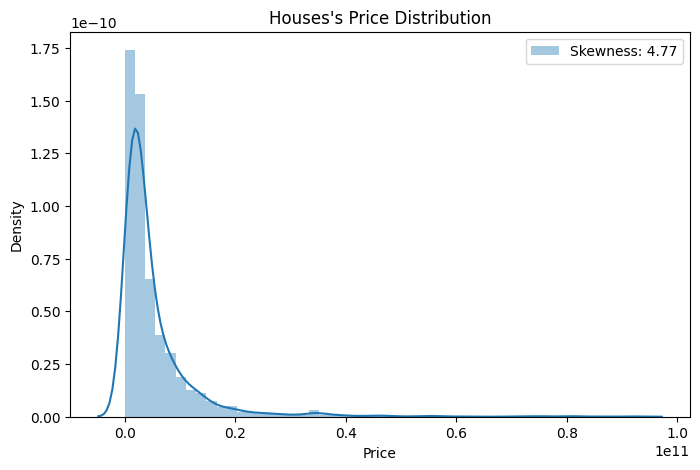

In [24]:
plt.figure(figsize = (8, 5))
sns.distplot(df['Price'], label = 'Skewness: {:.2f}'.format(df['Price'].skew()))
plt.legend(loc = 'best')
plt.title("Houses's Price Distribution")

<Axes: >

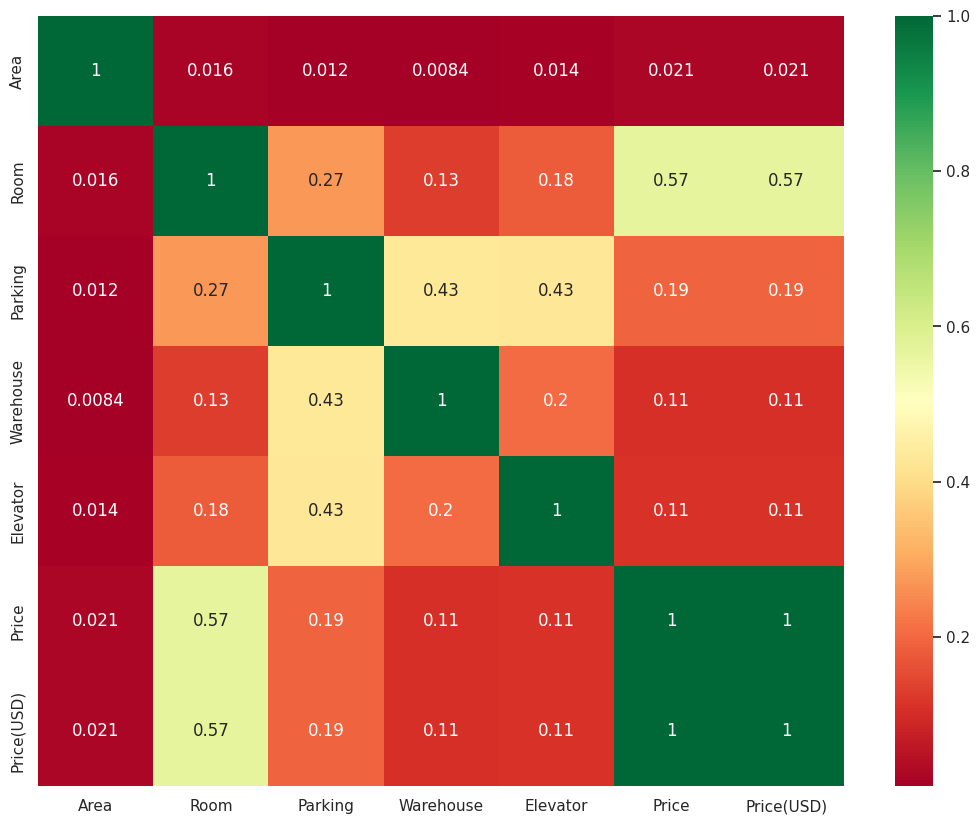

In [25]:
df
newdf = df.drop("Address", axis=1)
my_correlation = newdf.corr()
sns.set (rc = {"figure.figsize":(13,10)})
sns.heatmap(my_correlation,annot=True, cmap='RdYlGn')

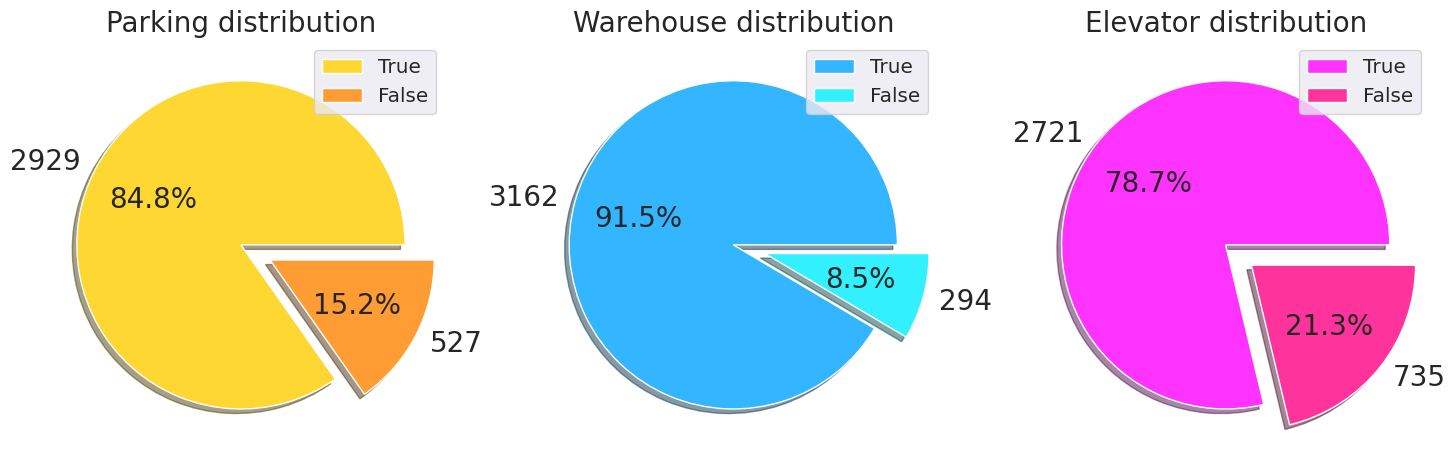

In [26]:
fig, ax = plt.subplots(ncols=3, figsize=(18,6))

colors = [['#FFD733', '#FF9C33'], ['#33B5FF', '#33F0FF'], ['#FF33FF', '#FF339C']]
explode = [0, 0.2]
columns = ['Parking', 'Warehouse', 'Elevator']
for i in range(3):
        data = df[columns[i]].value_counts()
        ax[i].pie(data, labels=data.values, explode=explode, colors=colors[i], shadow=True, autopct='%1.1f%%', textprops={'fontsize': 20})
        ax[i].legend(labels=data.index, fontsize='large')
        ax[i].set_title('{} distribution'.format(columns[i]), size = 20)

In [27]:
df3 = df['Address'].value_counts().copy()
df3 = df3[:8]
df3.index

Index(['Punak', 'Pardis', 'West Ferdows Boulevard', 'Gheitarieh', 'Shahran',
       'Saadat Abad', 'Parand', 'Shahr-e-Ziba'],
      dtype='object', name='Address')

In [28]:
df3

Address
Punak                     161
Pardis                    146
West Ferdows Boulevard    145
Gheitarieh                141
Shahran                   130
Saadat Abad               129
Parand                    127
Shahr-e-Ziba              109
Name: count, dtype: int64

In [29]:
df3.values

array([161, 146, 145, 141, 130, 129, 127, 109])

In [30]:
d = {"Values": df3.values, "Address": df3.index}
df_1 = pd.DataFrame(d)
print("The DataFrame ")
print(df_1)

The DataFrame 
   Values                 Address
0     161                   Punak
1     146                  Pardis
2     145  West Ferdows Boulevard
3     141              Gheitarieh
4     130                 Shahran
5     129             Saadat Abad
6     127                  Parand
7     109            Shahr-e-Ziba


In [31]:
fig = ex.sunburst(df_1, path = ['Values', 'Address'], values = "Values", color='Address')
fig.show()

In [32]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

In [33]:
df.sort_values('Price',ascending=False)[['Address']].head(20)

,Address
1707,Zaferanieh
1810,Abazar
430,Lavasan
819,Ekhtiarieh
1332,Niavaran
1694,Zafar
3051,Dorous
3107,Tajrish
831,Mahmoudieh
2394,Aqdasieh


## Preprocessing

In [34]:
df.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

In [35]:
df.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61667
1,60,1,True,True,True,Shahran,1850000000,61667
2,79,2,True,True,True,Pardis,550000000,18333
3,95,2,True,True,True,Shahrake Qods,902500000,30083
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333
5,70,2,True,True,False,North Program Organization,2050000000,68333
6,87,2,True,True,True,Pardis,600000000,20000
7,59,1,True,True,True,Shahran,2150000000,71667
8,54,2,True,True,False,Andisheh,493000000,16433
9,71,1,True,True,True,West Ferdows Boulevard,2370000000,79000


## Model Building

In [36]:
df = df.drop(columns = ['Price(USD)'])
boolean_features = ['Parking','Warehouse','Elevator']
df[boolean_features] = df[boolean_features].astype('int64')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,1,1,1,Shahran,1850000000
1,60,1,1,1,1,Shahran,1850000000
2,79,2,1,1,1,Pardis,550000000
3,95,2,1,1,1,Shahrake Qods,902500000
4,123,2,1,1,1,Shahrake Gharb,7000000000


In [37]:
print(f"Skewness of features:\n{newdf.skew()}")

Skewness of features:
Area         44
Room          1
Parking      -2
Warehouse    -3
Elevator     -1
Price         5
Price(USD)    5
dtype: float64


In [38]:
plt.figure(figsize = (16,8))
ex.violin(x='Price', data_frame=df)

<Figure size 1600x800 with 0 Axes>

In [39]:
ex.violin(x='Area', data_frame=df)

In [40]:
stat = boxplot_stats(df.Area)
stat

[{'mean': 8802191.396122685,
  'iqr': 52.0,
  'cilo': 88.61127539860543,
  'cihi': 91.38872460139457,
  'whishi': 198,
  'whislo': 30,
  'fliers': array([        215,         300,         245,         200,         236,
                 220,         200,         320,         200,         210,
                 200,         270,         200,         210,         230,
                 450,         500,         265,         200,         350,
                 335,         320,         235,         225,         221,
                 312,         650,         200,         256,         257,
                 246,         280,         400,         660,         213,
                 300,         245,         300,         200,         282,
                 282,         210,         320,         220,         235,
                 300,         283,  3310000000,         863,         230,
                 200,         415,         200,         210,         245,
                 235,         261, 161600

In [41]:
stat = boxplot_stats(df.Price)
stat

[{'mean': 5379956886.600405,
  'iqr': 4580000000.0,
  'cilo': 2777685410.1079392,
  'cihi': 3022314589.8920608,
  'whishi': 12850000000,
  'whislo': 3600000,
  'fliers': array([14945000000, 16900000000, 20000000000, 26950000000, 24300000000,
         20000000000, 15400000000, 24000000000, 15750000000, 37800000000,
         21500000000, 20700000000, 13000000000, 17000000000, 27000000000,
         15600000000, 15350000000, 15100000000, 17050000000, 17600000000,
         25300000000, 15400000000, 22750000000, 15500000000, 20000000000,
         15500000000, 17500000000, 16580000000, 52500000000, 33500000000,
         40000000000, 19500000000, 14800000000, 14700000000, 22000000000,
         16450000000, 15750000000, 25000000000, 45000000000, 17672000000,
         27720000000, 18700000000, 16200000000, 13800000000, 18500000000,
         22500000000, 14000000000, 38500000000, 85000000000, 55000000000,
         14484000000, 55500000000, 36500000000, 55500000000, 35000000000,
         181450000

In [42]:
df.shape

(3456, 7)

In [43]:
Q1 = df.Price.quantile(0.25)
Q3 = df.Price.quantile(0.75)
Q1, Q3

(1420000000.0, 6000000000.0)

In [44]:
IQR = Q3 - Q1
IQR

4580000000.0

In [45]:
lower_limit_price = Q1 - 1.5*IQR
upper_limit_price = Q3 + 1.5*IQR
lower_limit_price, upper_limit_price

(-5450000000.0, 12870000000.0)

In [46]:
df[(df.Price<lower_limit_price)|(df.Price>upper_limit_price)]

,Area,Room,Parking,Warehouse,Elevator,Address,Price
25,160,3,1,1,1,Velenjak,14945000000
102,130,2,1,1,1,Dorous,16900000000
146,150,3,1,1,1,Saadat Abad,20000000000
160,245,3,1,1,1,Farmanieh,26950000000
161,190,3,1,1,1,Kamranieh,24300000000
...,...,...,...,...,...,...,...
3366,197,3,1,1,1,Marzdaran,15563000000
3373,193,3,1,1,1,Kook,13000000000
3394,54,1,1,1,1,West Ferdows Boulevard,22500000003
3438,186,3,1,1,1,Velenjak,15000000000


In [47]:
df = df[(df.Price>lower_limit_price)&(df.Price<upper_limit_price)]
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,1,1,1,Shahran,1850000000
1,60,1,1,1,1,Shahran,1850000000
2,79,2,1,1,1,Pardis,550000000
3,95,2,1,1,1,Shahrake Qods,902500000
4,123,2,1,1,1,Shahrake Gharb,7000000000
...,...,...,...,...,...,...,...
3474,86,2,1,1,1,Southern Janatabad,3500000000
3475,83,2,1,1,1,Niavaran,6800000000
3476,75,2,0,0,0,Parand,365000000
3477,105,2,1,1,1,Dorous,5600000000


In [48]:
Q1 = df.Area.quantile(0.25)
Q3 = df.Area.quantile(0.75)
Q1, Q3

(67.0, 110.0)

In [49]:
IQR = Q3 - Q1
IQR

43.0

In [50]:
lower_limit_area = Q1 - 1.5*IQR
upper_limit_area = Q3 + 1.5*IQR
lower_limit_area, upper_limit_price

(2.5, 12870000000.0)

In [51]:
df[(df.Area<lower_limit_area)|(df.Price>upper_limit_area)]

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,1,1,1,Shahran,1850000000
1,60,1,1,1,1,Shahran,1850000000
2,79,2,1,1,1,Pardis,550000000
3,95,2,1,1,1,Shahrake Qods,902500000
4,123,2,1,1,1,Shahrake Gharb,7000000000
...,...,...,...,...,...,...,...
3474,86,2,1,1,1,Southern Janatabad,3500000000
3475,83,2,1,1,1,Niavaran,6800000000
3476,75,2,0,0,0,Parand,365000000
3477,105,2,1,1,1,Dorous,5600000000


In [52]:
df = df[(df.Area>lower_limit_area)&(df.Area<upper_limit_area)]
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,1,1,1,Shahran,1850000000
1,60,1,1,1,1,Shahran,1850000000
2,79,2,1,1,1,Pardis,550000000
3,95,2,1,1,1,Shahrake Qods,902500000
4,123,2,1,1,1,Shahrake Gharb,7000000000
...,...,...,...,...,...,...,...
3474,86,2,1,1,1,Southern Janatabad,3500000000
3475,83,2,1,1,1,Niavaran,6800000000
3476,75,2,0,0,0,Parand,365000000
3477,105,2,1,1,1,Dorous,5600000000


In [53]:
df.shape

(3057, 7)

In [54]:
address_dummy = pd.get_dummies(df['Address'])
df_final = df.merge(address_dummy, left_index = True, right_index = True)
df_final.drop(columns = 'Address', inplace = True)
df_final.head(5)

,Area,Room,Parking,Warehouse,Elevator,Price,Abazar,Abbasabad,Abuzar,Afsarieh,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63,1,1,1,1,1850000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,60,1,1,1,1,1850000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,79,2,1,1,1,550000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,95,2,1,1,1,902500000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,123,2,1,1,1,7000000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
df_final["Area"].max()

174

In [56]:
X = df_final.drop(columns = 'Price')
y = df_final['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(f"shape of x train: {X_train.shape}")
print(f"shape of y train: {y_train.shape}")
print(f"shape of x test: {X_test.shape}")
print(f"shape of y test: {y_test.shape}")

shape of x train: (2445, 192)
shape of y train: (2445,)
shape of x test: (612, 192)
shape of y test: (612,)


In [57]:
def parameter_finder (model, parameters):
    
    start = time.time()
    
    grid = GridSearchCV(model, 
                        param_grid = parameters, 
                        refit = True, 
                        cv = KFold(shuffle = True, random_state = 1), 
                        n_jobs = -1)
    grid_fit = grid.fit(X_train, y_train)
    y_train_pred = grid_fit.predict(X_train)
    y_pred = grid_fit.predict(X_test)
    
    train_score =grid_fit.score(X_train, y_train)
    test_score = grid_fit.score(X_test, y_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    
    model_name = str(model).split('(')[0]
    
    end = time.time()
    
    print(f"The best parameters for {model_name} model is: {grid_fit.best_params_}")
    print("--" * 10)
    print(f"(R2 score) in the training set is {train_score:0.2%} for {model_name} model.")
    print(f"(R2 score) in the testing set is {test_score:0.2%} for {model_name} model.")
    print(f"RMSE is {RMSE:,} for {model_name} model.")
    print("--" * 10)
    print(f"Runtime of the program is: {end - start:0.2f}")
    
       
    return train_score, test_score, RMSE

In [58]:
lr = LinearRegression(n_jobs = -1)

lr_train_score, lr_test_score, lr_RMSE = parameter_finder(lr, {})

The best parameters for LinearRegression model is: {}
--------------------
(R2 score) in the training set is 87.49% for LinearRegression model.
(R2 score) in the testing set is -6752421849824722944.00% for LinearRegression model.
RMSE is 6.960316718726726e+17 for LinearRegression model.
--------------------
Runtime of the program is: 2.36


In [59]:
ridge = Ridge(random_state = 1) # Linear least squares with l2 regularization.
param_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

ridge_train_score, ridge_test_score, ridge_RMSE = parameter_finder(ridge, param_ridge)

The best parameters for Ridge model is: {'alpha': 0.1}
--------------------
(R2 score) in the training set is 87.47% for Ridge model.
(R2 score) in the testing set is 83.42% for Ridge model.
RMSE is 1,090,725,792.862671 for Ridge model.
--------------------
Runtime of the program is: 0.35


In [60]:
lasso = Lasso(random_state = 1) # Linear Model trained with L1 prior as regularizer.
param_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

lasso_train_score, lasso_test_score, lasso_RMSE = parameter_finder(lasso, param_lasso)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.640e+20, tolerance: 1.513e+18
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.533e+20, tolerance: 1.501e+18
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.298e+20, tolerance: 1.572e

The best parameters for Lasso model is: {'alpha': 10}
--------------------
(R2 score) in the training set is 87.49% for Lasso model.
(R2 score) in the testing set is 83.32% for Lasso model.
RMSE is 1,093,943,643.9222395 for Lasso model.
--------------------
Runtime of the program is: 5.80


In [61]:
eln = ElasticNet(random_state = 1) # Linear regression with combined L1 and L2 priors as regularizer.
param_eln = {'alpha': [0.001, 0.01, 0.1, 1, 10],
            'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7]}

eln_train_score, eln_test_score, eln_RMSE = parameter_finder(eln, param_eln)

The best parameters for ElasticNet model is: {'alpha': 0.001, 'l1_ratio': 0.7}
--------------------
(R2 score) in the training set is 87.12% for ElasticNet model.
(R2 score) in the testing set is 83.39% for ElasticNet model.
RMSE is 1,091,726,308.9400792 for ElasticNet model.
--------------------
Runtime of the program is: 2.83


In [62]:
dtr = DecisionTreeRegressor(random_state = 1)
param_dtr = {'min_samples_split': [2, 3, 4, 5],
            'min_samples_leaf': [1, 2, 3]}

dtr_train_score, dtr_test_score, dtr_RMSE = parameter_finder(dtr, param_dtr)

The best parameters for DecisionTreeRegressor model is: {'min_samples_leaf': 1, 'min_samples_split': 5}
--------------------
(R2 score) in the training set is 96.72% for DecisionTreeRegressor model.
(R2 score) in the testing set is 73.43% for DecisionTreeRegressor model.
RMSE is 1,380,797,936.399059 for DecisionTreeRegressor model.
--------------------
Runtime of the program is: 0.78


In [63]:
rfr = RandomForestRegressor(random_state = 1, n_jobs = -1)
param_rfr = {'min_samples_split': [2, 3, 4, 5],
            'min_samples_leaf': [1, 2, 3]}

rfr_train_score, rfr_test_score, rfr_RMSE = parameter_finder(rfr, param_rfr)

The best parameters for RandomForestRegressor model is: {'min_samples_leaf': 1, 'min_samples_split': 5}
--------------------
(R2 score) in the training set is 94.85% for RandomForestRegressor model.
(R2 score) in the testing set is 78.91% for RandomForestRegressor model.
RMSE is 1,230,138,176.8329213 for RandomForestRegressor model.
--------------------
Runtime of the program is: 32.08


In [64]:
knr = KNeighborsRegressor(n_jobs = -1)
param_knr = {'n_neighbors': [5, 10, 15, 20],
            'weights': ['uniform', 'distance']}

knr_train_score, knr_test_score, knr_RMSE = parameter_finder(knr, param_knr)

The best parameters for KNeighborsRegressor model is: {'n_neighbors': 20, 'weights': 'distance'}
--------------------
(R2 score) in the training set is 98.23% for KNeighborsRegressor model.
(R2 score) in the testing set is 60.45% for KNeighborsRegressor model.
RMSE is 1,684,410,384.7033691 for KNeighborsRegressor model.
--------------------
Runtime of the program is: 1.67


## Application 

**ElasticNet was used and save with joblib for create an Application  (Linear regression with combined L1 and L2 priors as regularizer) and you can see the results:** https://houseprice-mtudvns4fjqjfrdhdtwnrh.streamlit.app/